In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('data\StudentsPerformance.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [13]:
df.shape

(1000, 8)

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**NO NULL VALUES**

In [23]:
df.duplicated().sum()

0

**NO DUPLICATE VALUES**

In [46]:
print(df['race/ethnicity'].value_counts())
print()
print(df['gender'].value_counts())
print()
print(df['parental level of education'].value_counts())
print()
print(df['lunch'].value_counts())
print()

print(df['test preparation course'].value_counts())


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

gender
female    518
male      482
Name: count, dtype: int64

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course
none         642
completed    358
Name: count, dtype: int64


In [49]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [54]:
df['total_score']= df['math score']+df['reading score']+df['writing score']
df['average_score']=(df['total_score']/3).round(2)

In [56]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [72]:
math_full=df[df['math score']==100]['gender'].count()
reading_full=df[df['reading score']==100]['gender'].count()
writing_full=df[df['writing score']==100]['gender'].count()

In [73]:
print(f'no. of students who have full marks in maths : {math_full}')
print(f'no. of students who have full marks in reading : {reading_full}')
print(f'no. of students who have full marks in writing : {writing_full}')

no. of students who have full marks in maths : 7
no. of students who have full marks in reading : 17
no. of students who have full marks in writing : 14


In [75]:
math_less=df[df['math score']<=10]['gender'].count()
reading_less=df[df['reading score']<=10]['gender'].count()
writing_less=df[df['writing score']<=10]['gender'].count()

In [76]:
print(f'no. of students who have poor marks in maths : {math_less}')
print(f'no. of students who have poor marks in reading : {reading_less}')
print(f'no. of students who have poor marks in writing : {writing_less}')

no. of students who have poor marks in maths : 2
no. of students who have poor marks in reading : 0
no. of students who have poor marks in writing : 1


WORST PERFORMANCE IN MATHS

BEST PERFORMANCE IN READING



In [77]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'average_score'],
      dtype='object')

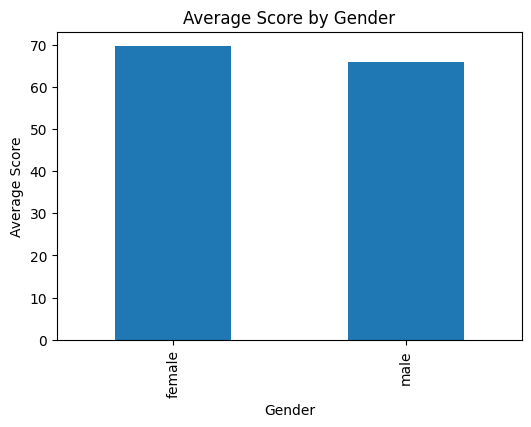

In [78]:

plt.figure(figsize=(6,4))
df.groupby('gender')['average_score'].mean().plot(kind='bar')
plt.title("Average Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()


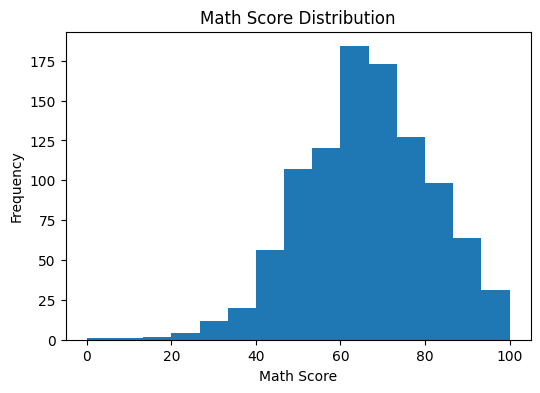

In [79]:
plt.figure(figsize=(6,4))
plt.hist(df['math score'], bins=15)
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()


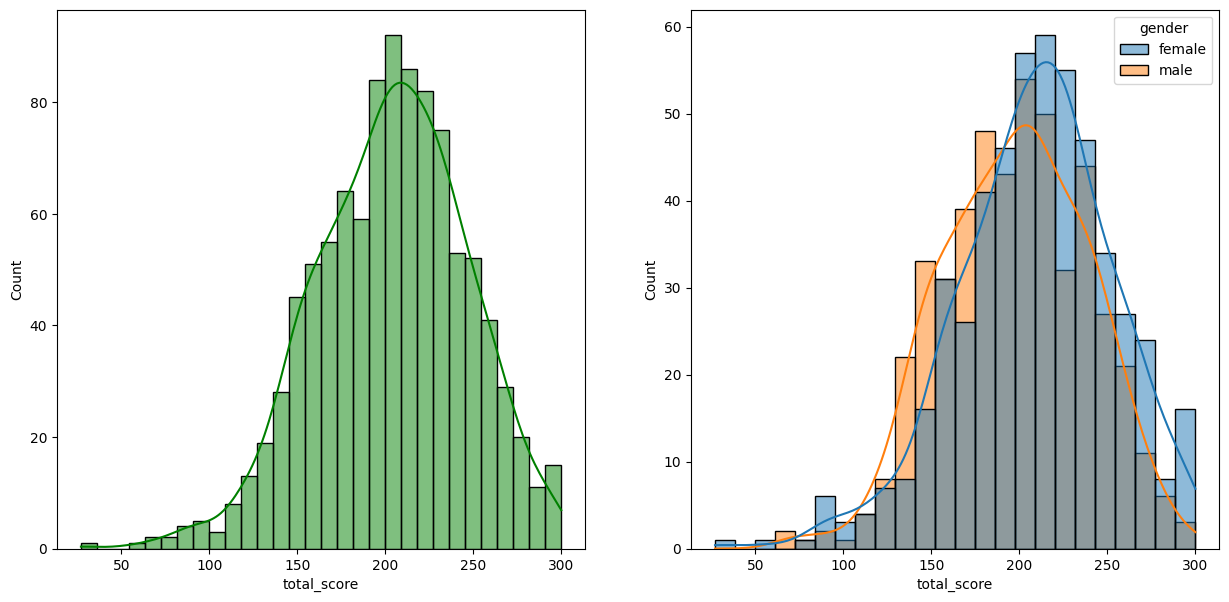

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score', kde=True, bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score', kde=True,hue='gender')
plt.show()


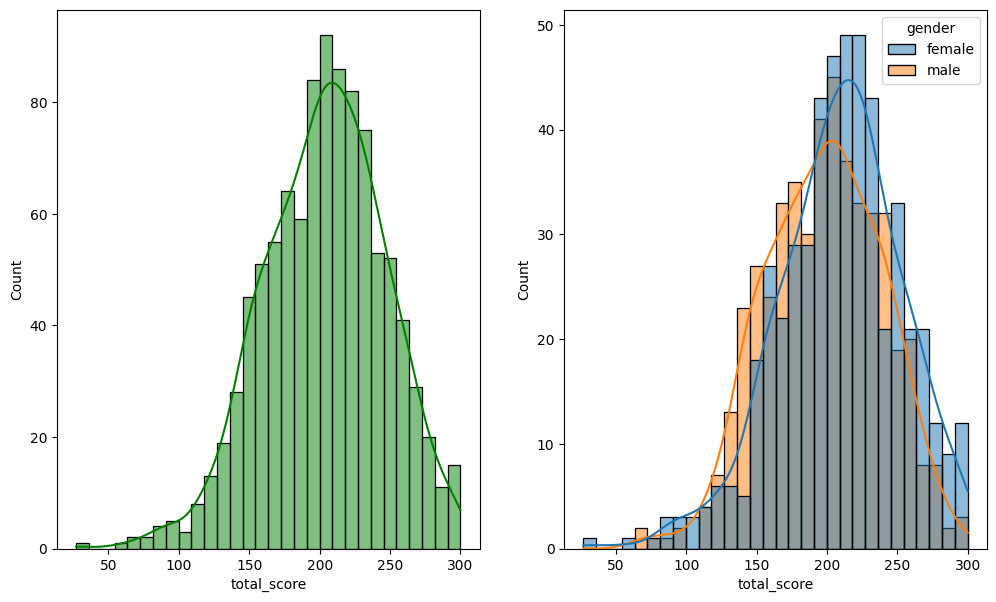

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

# First subplot
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_score', kde=True, bins=30, color='g')


# Second subplot

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_score', kde=True, bins=30, hue='gender')

plt.show()
